# LIBS

In [357]:
#import user modules
import helper_functions as hfun
import config as cf
import thouless_times as thouless
import importlib
importlib.reload(thouless)
importlib.reload(hfun)
importlib.reload(cf)

#--- importet in user module
import matplotlib.pyplot as plt
import matplotlib
from matplotlib.markers import MarkerStyle
import os

#--- other modules
import numpy as np
import itertools
import seaborn as sns
import pandas as pd
import math
import random
import imageio
import scipy.stats as stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
from scipy.optimize import curve_fit
from joblib import Parallel, delayed
#plt.style.use(['science','ieee','no-latex'])

# get all the colors
import matplotlib.colors as mcolors

print(cf.base_directory)

../results/disorder/PBC/


# MODEL INPUT AND OTHER INFO

In [358]:
base_info = hfun.info(cf.L, cf.J, cf.J0, cf.g, cf.g0, cf.h, cf.w, cf.k_sym, cf.p_sym, cf.x_sym)
print(base_info)
print(hfun.remove_info(base_info, 'g', 'w', 'L'))
hfun.print_vars(cf.params_arr, cf.names)


_L=12,J=1.00,J0=0.00,g=0.90,g0=0.00,h=0.80,w=1.00.dat
,J=1.00,J0=0.00,g0=0.00,h=0.80
L=12
J=1.00
g=0.90
h=0.80
w=1.00
k=0
p=1
x=1
J0=0.00
x0=0.00


# SPECTRAL FORM FACTOR

# THOULESS TIME

### PLOT DATA

{'vs': 'g', 'scaling': 'L', 'x_scale': 'linear', 'y_scale': 'log', 'physical_units': 1, 'rescaleY': 1, 'rescaleX': 0, 'func_x': 'exp', 'nu': 2, 'vs_idx': 2, 'scaling_idx': 0, 'func_x_name': '', 'func_Y_name': ''}
L=12
J=1.00
g=0.90
h=0.80
w=1.00
k=0
p=1
x=1
J0=0.00
x0=0.00


KeyError: 'rescale'

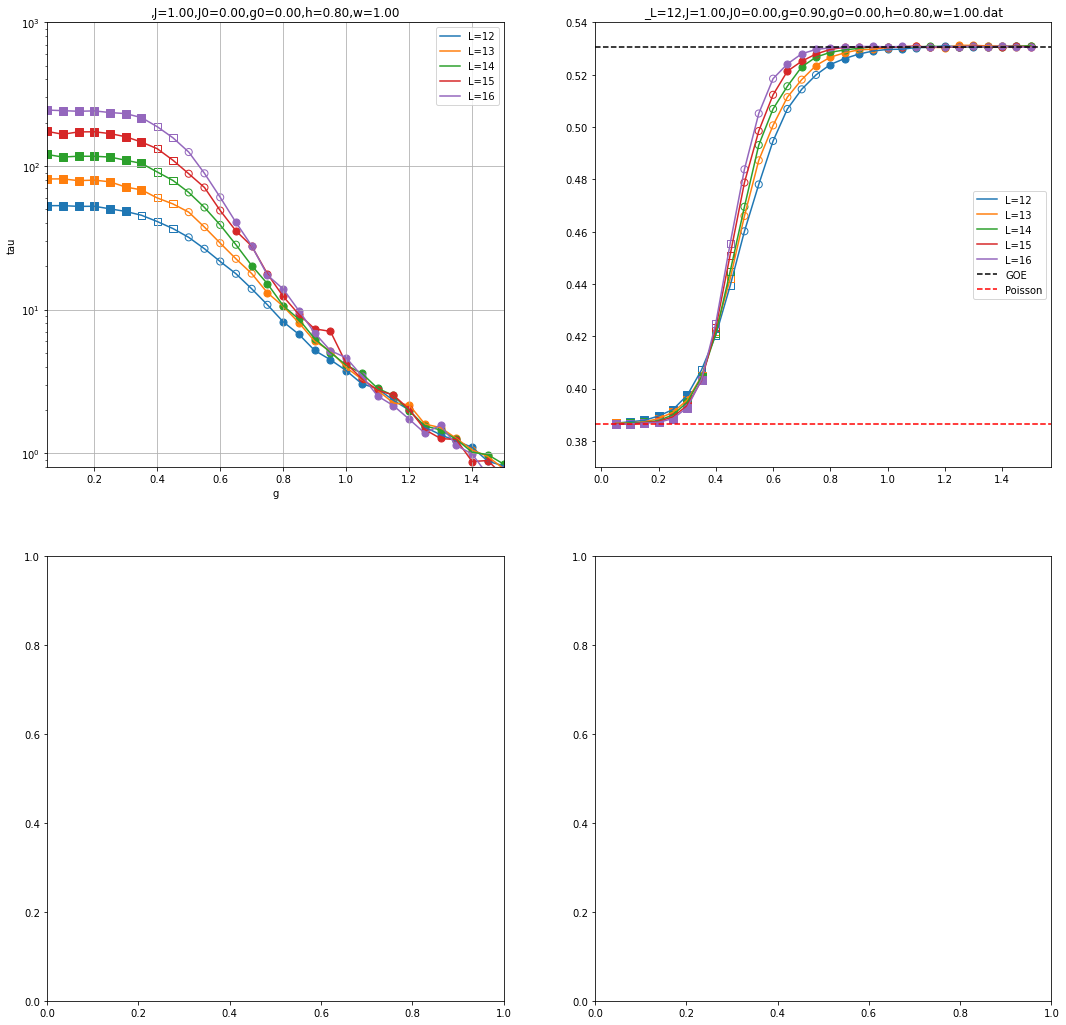

In [359]:
#--- set initial plot settings
fig, ((axis1, axis2), (axis3, axis4)) = plt.subplots(2,2)
fig.set_size_inches(18,18)
def xform(x) :
        return x if cf.plot_settings.settings['rescaleX'] == 0 else 1. / x**cf.plot_settings.settings['nu']
thouless.plot(axis1, axis2)
x = np.array(range(5, 150, 5)) / 100.
#axis1.plot(xform(x), 2e1 / x**2, ls='--', color='black', label=r'$x^{-2}$')
axis1.plot(xform(x), 1.5e2*np.exp(-3.5*x), ls='--', color='black', label=r'$exp(-x)$')

new_settings = cf.plot_settings
new_settings.set_vs('J')
new_settings.set_scaling('w')
new_settings.set_x_rescale(rescale = 1, exponent=2.0)
new_settings.set_scales(xscale = 'log')
cf.set_params(_L = 14)
thouless.plot(axis3, axis4, new_settings.settings)

x = np.array(range(5, 100, 5)) / 100.
axis3.plot(xform(x), 1e2 / x**2, ls='--', color='black', label=r'$x^{-2}$')
axis3.set_xlim([0.5, 50])
plt.show()